<h1>Preparing a Dataset for Modeling</h1>

A mobile app data set extracted from iTunes Search API at the Apple Inc website is used for this task. The csv and an overview of the data set are availabe
<a href="https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps">here</a>. 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
AppleStore = pd.read_csv('AppleStore.csv')
AppleStore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
AppleStore = AppleStore.rename(columns = {'Unnamed: 0':'rank'})

In [4]:
AppleStore['currency'].value_counts() # the currency column can be dropped because it has only USD as a value 

USD    7197
Name: currency, dtype: int64

In [5]:
AppleStore = AppleStore.drop(['currency'], axis=1)


In [6]:
AppleStore.head()

,rank,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [7]:
AppleStore['size_bytes'] = AppleStore['size_bytes'].abs() # some values seem to have negative values. Take the absolute value

<h3>Variables</h3>

Average User Rating value for all versions (user_rating) will be an outcome variable

<b>Other selected variables</b>

    Categorical
   <ul> 
    <li>user_rating_ver (Average User Rating value for current version)</li>
    <li>cont_rating (Content Rating)</li>
    <li>prime_genre (Primary Genre)</li>
   </ul>
   
    Continious
   <ul> 
    <li>size_bytes (Size in Bytes)</li>
    <li>price (Price Amount)</li>
    <li>rating_count_tot (User Rating Counts for all Versions)</li>
    <li>rating_count_ver (User Rating Counts for current Versions)</li>
    <li>cont_rating (Content Rating)</li>
    <li>sup_devices.num (Number of supporting devices)</li>
    <li>ipadSc_urls.num (Number of screenshots showed for display)</li>
   </ul>
   
   <h3>Exploring the Data: Univariate</h3>
   
   

In [8]:
AppleStore.shape

(7197, 16)

In [9]:
AppleStore.dtypes # check if the data is in the right format
#df['COST'] = df.COST.astype(float)
AppleStore['size_bytes'] = AppleStore.size_bytes.astype(int)

In [11]:
AppleStore['cont_rating'] = AppleStore.cont_rating.str.replace('+','')

In [12]:
# make sure the continiuous variables are of numeric type 
cols = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'cont_rating', 'sup_devices.num', 'ipadSc_urls.num']
for column in cols:
    AppleStore[column] = pd.to_numeric(AppleStore[column])


In [13]:
AppleStore['price'] = AppleStore.price.astype(int)

In [14]:
AppleStore.dtypes # check if the data is in the right format

rank                  int64
id                    int64
track_name           object
size_bytes            int32
price                 int32
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating           int64
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [15]:
AppleStore.isnull().sum() # no missing values

rank                0
id                  0
track_name          0
size_bytes          0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [16]:
AppleStore.describe()

,rank,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.00000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.663120e+08,1.29415,1.289291e+04,460.373906,3.526956,3.253578,7.093094,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.085930e+08,5.68670,7.573941e+04,3920.455183,1.517948,1.809363,4.329046,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,-2.125365e+09,0.00000,0.000000e+00,0.000000,0.000000,0.000000,4.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.531098e+07,0.00000,2.800000e+01,1.000000,3.500000,2.500000,4.000000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.560781e+07,0.00000,3.000000e+02,23.000000,4.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.775534e+08,1.00000,2.793000e+03,140.000000,4.500000,4.500000,9.000000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,2.116109e+09,299.00000,2.974676e+06,177050.000000,5.000000,5.000000,17.000000,47.000000,5.000000,75.000000,1.000000


 <h3>Exploring the Data: Univariate</h3>
 
Examining the pairwise relationships between the selected continious variables using a scatterplot and correlation matrices.  

C:\Users\Omistaja\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


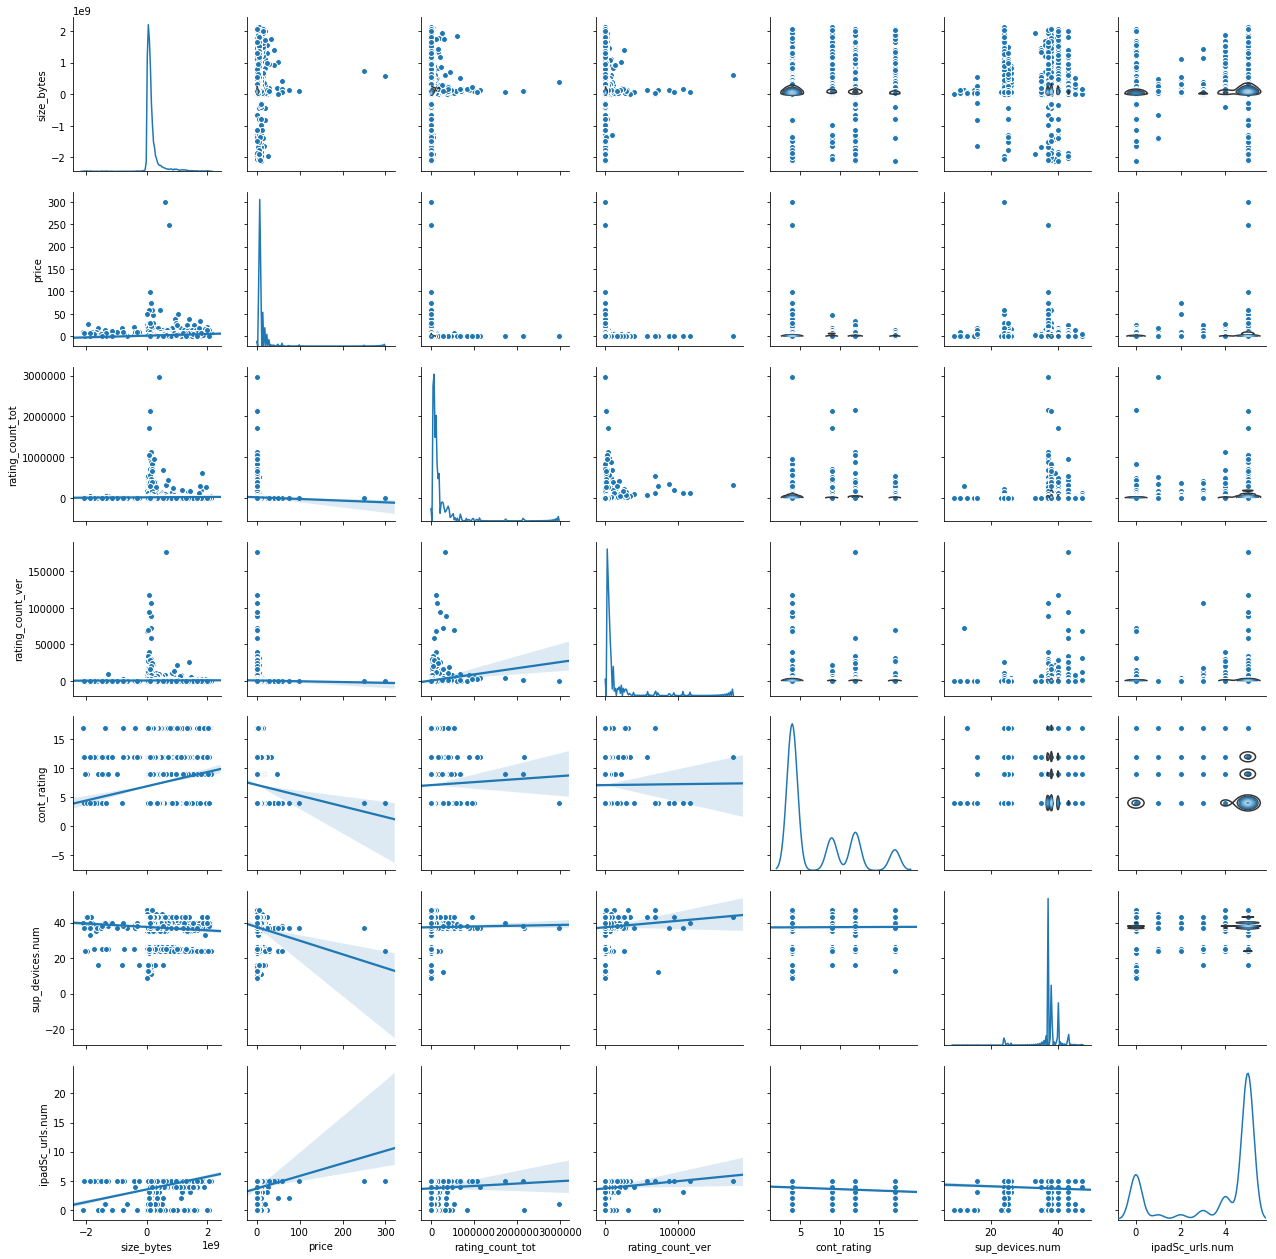

In [19]:
g = sns.pairplot(AppleStore[cols], diag_kind='kde').map_lower(sns.regplot, scatter_kws=dict(alpha=0)).map_upper(sns.kdeplot, cmap="Blues_d")
plt.show()                                

                  size_bytes     price  rating_count_tot  rating_count_ver  \
size_bytes          1.000000  0.101897          0.016972          0.008116   
price               0.101897  1.000000         -0.031165         -0.015746   
rating_count_tot    0.016972 -0.031165          1.000000          0.163645   
rating_count_ver    0.008116 -0.015746          0.163645          1.000000   
cont_rating         0.087693 -0.024307          0.009139          0.001435   
sup_devices.num    -0.079337 -0.116585          0.008832          0.037951   
ipadSc_urls.num     0.168871  0.061795          0.015734          0.024333   

                  cont_rating  sup_devices.num  ipadSc_urls.num  
size_bytes           0.087693        -0.079337         0.168871  
price               -0.024307        -0.116585         0.061795  
rating_count_tot     0.009139         0.008832         0.015734  
rating_count_ver     0.001435         0.037951         0.024333  
cont_rating          1.000000         0.02008

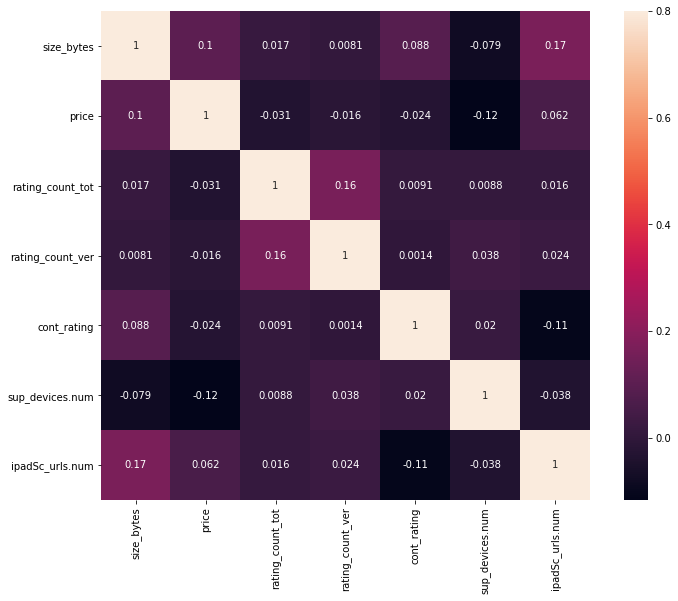

In [20]:
corrmat = AppleStore[cols].corr() # correlation matrix 
print(corrmat)


print('The variables have very low collinearity indicating the abscence of any significant relationship between them.')

f, ax =plt.subplots(figsize=(12,9)) # matrix figure
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

### Creating New Features

<b>FreeApps</b> feature. This lets comparisions of user rating (outcome variable) to be made for free versus paid apps.

In [21]:
# free versus paid apps
features = pd.get_dummies(AppleStore['price']) # also creates the data frame to add features to
features['FreeApps'] = np.where(AppleStore['price']== 0, 1,0)
#print(AppleStore['price'].groupby(features['FreeApps']).describe())
print(pd.crosstab(features['FreeApps'], AppleStore['price']))

price      0    1    2    3    4    5    6    7    8    9   ...   29   34   \
FreeApps                                                    ...              
0            0  621  683  277  394   52  166   33    9   81 ...     6    1   
1         4784    0    0    0    0    0    0    0    0    0 ...     0    0   

price     39   47   49   59   74   99   249  299  
FreeApps                                          
0           2    1    2    3    1    1    1    1  
1           0    0    0    0    0    0    0    0  

[2 rows x 35 columns]


<b>prime_genre</b>. Games make up the majority of the Apps and creating a feature for games and other genres seems approprite.

In [22]:
counts = AppleStore['prime_genre'].value_counts() # find the counts for each unique category
counts

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [23]:
AppleStore['prime_genre'] = AppleStore['prime_genre'].replace(['Entertainment', 'Education', 'Photo & Video', 'Utilities', 'Health & Fitness', 'Productivity', 'Social Networking', 
                                                          'Lifestyle', 'Music', 'Shopping', 'Sports', 'Book', 'Finance', 'Travel', 'News', 'Weather', 'Reference', 'Food & Drink', 
                                                          'Business', 'Navigation', 'Medical', 'Catalogs'], 'Other')
AppleStore['prime_genre'] = AppleStore['prime_genre'].replace(['Game'], 'Games')

<B>Games</b> and everything else feature 

In [24]:
features['Games'] = np.where((AppleStore['prime_genre'].isin(['Games'])), 1, 0)

print(pd.crosstab(features['Games'], AppleStore['prime_genre']))

prime_genre  Games  Other
Games                    
0                0   3335
1             3862      0


The <b>multi_lang</b> feature helps to factor in the effect of having multiple language support in the apps. 

In [25]:
features['multi_lang'] = np.where(AppleStore['lang.num']>0, 1,0)
print(pd.crosstab(features['multi_lang'], AppleStore['lang.num']))# AppleStore['lang.num'].groupby(features['multi_lang']).describe()

lang.num    0     1    2    3    4    5    6    7    8    9  ...  54  55  56  \
multi_lang                                                   ...               
0           41     0    0    0    0    0    0    0    0    0 ...   0   0   0   
1            0  3767  675  217  154  207  143  133  145  138 ...   2   2   1   

lang.num    58  59  63  68  69  74  75  
multi_lang                              
0            0   0   0   0   0   0   0  
1           12   1   1   1   3   1   1  

[2 rows x 57 columns]


The <b>high_rating</b> feature helps sort the apps based on the ratings they get from users  

In [26]:
features['high_rating'] = np.where(AppleStore['user_rating']>=4, 1,0)
AppleStore['user_rating'].groupby(features['high_rating']).describe()

,count,mean,std,min,25%,50%,75%,max
high_rating,,,,,,,,
0,2416.0,1.836093,1.539083,0.0,0.0,2.5,3.5,3.5
1,4781.0,4.381406,0.310977,4.0,4.0,4.5,4.5,5.0


In [27]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,49,59,74,99,249,299,FreeApps,Games,multi_lang,high_rating
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


### PCA

In [28]:
from sklearn import preprocessing

In [29]:
# The variables in hte data set have very low correlation and hence not suited to PCA. The following variables are selected for demo. 
pca_cols = ['rating_count_tot', 'rating_count_ver', 'cont_rating']
AppleStore_pca = AppleStore[pca_cols]

In [30]:
AppleStore_pca.head()

,rating_count_tot,rating_count_ver,cont_rating
0,21292,26,4
1,161065,26,4
2,188583,2822,4
3,262241,649,12
4,985920,5320,4


In [31]:
# pca works best with normalized data
X = StandardScaler().fit_transform(AppleStore_pca)
Xt = X.T # transpose x
Cx = np.cov(Xt)
print(Cx)

[[1.00013897 0.16366734 0.00914051]
 [0.16366734 1.00013897 0.00143493]
 [0.00914051 0.00143493 1.00013897]]


In [32]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

eig_val_cov / sum(eig_val_cov)

Eigenvector 1: 
[[0.70690775]
 [0.70583607]
 [0.04557279]]
Eigenvalue 1: 1.164147456874871
----------------------------------------
Eigenvector 2: 
[[ 0.70725226]
 [-0.70617796]
 [-0.03327053]]
Eigenvalue 2: 0.8362902410289963
----------------------------------------
Eigenvector 3: 
[[-0.00869896]
 [-0.05575066]
 [ 0.99840683]]
Eigenvalue 3: 0.999979200372953
----------------------------------------


array([0.38799523, 0.27872468, 0.33328009])

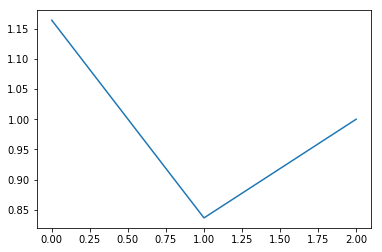

In [33]:
plt.plot(eig_val_cov)
plt.show()

The components don't add much value because the variables are unrelated. The first component with eigenvalue of 1.164 should be kept. 